## Locally Weighted Regression
1) Read and Normalise the Dataset 

2) Generate W for every query point!

3) No training is involved, directly make predictions using closed form solution we dervied!

`(X′WX)inv * X′WY` where X' is X_Transpose

4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

## 1. Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')


In [3]:
X = dfx.values
Y = dfy.values

In [4]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [5]:
plt.style.use("seaborn")

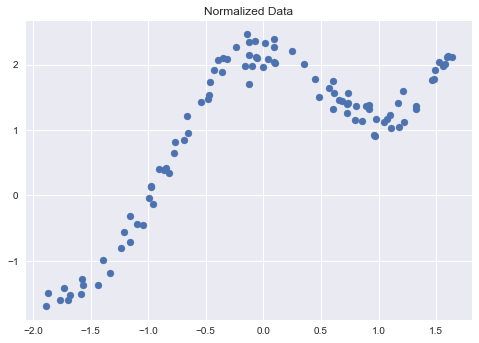

In [6]:
#Normalisze the Data

u = X.mean()
std = X.std()
X = (X-u)/std

plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()


## 2. Find out W (mxm) diagonal matrix

In [19]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [20]:
np.eye(5)
print(type(np.eye(5)))

<class 'numpy.ndarray'>


In [22]:
np.mat(np.eye)##Converting it into matrix

matrix([[<function eye at 0x0D840C40>]], dtype=object)

In [23]:
#print(type(np.mat(np.eye(5))))

#a*b ==>if they are matrices a,b -->matrices -->Matrix Multicplication
#a*b ==>? if they are numpy array a,b -->arrays --->Element Wise 

In [8]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [9]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

#If i increase tau it reaches close to identity matrix
W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


## 3 . Make Predictions

In [11]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred
    

In [12]:
theta,pred = predict(X,Y,1.0,1.0)

In [13]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [14]:
print(pred)

[[1.59417694]]


## 4. Visualise Predictions, Analyse the Effect of Tau

In [15]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()
    

## on Icreasing tau prediction will become worse and will start approaching like a linear regression

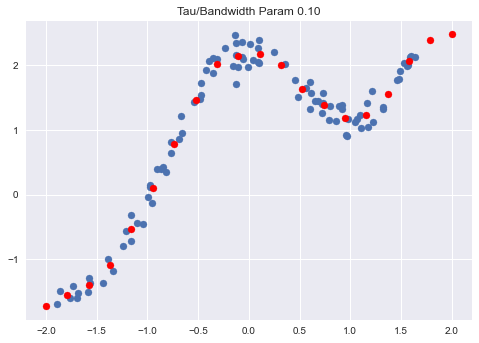

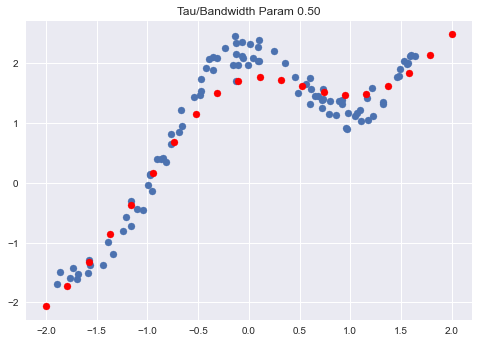

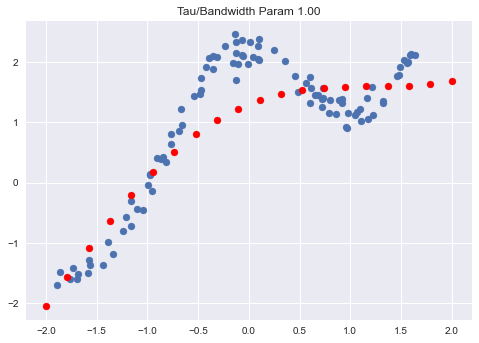

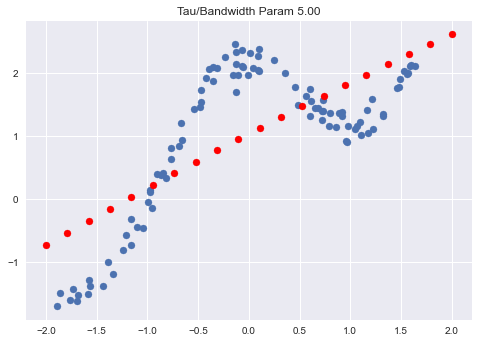

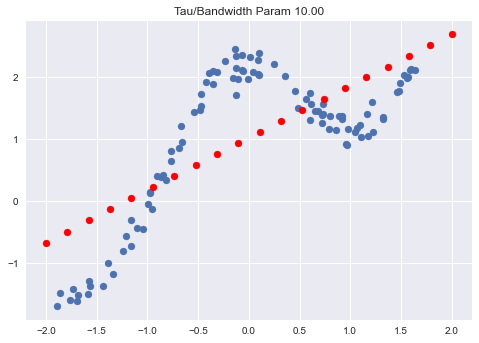

In [40]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)


In [33]:
ada = np.arange(1,5,1)

In [36]:
adu = np.mat(ada)
print(adu)

[[1 2 3 4]]


In [30]:
adu = np.mat([ada,1])

In [37]:
adu

matrix([[1, 2, 3, 4]])

In [31]:
print(adu)

[[array([[1],
       [2],
       [3],
       [4]]) 1]]


In [38]:
nu = np.linspace(-2,2,20)

In [39]:
print(nu)

[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
